In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from scipy import stats
import statistics
sns.set()

from pathlib import Path
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# loading data
kmp_multip = pd.read_csv('kmp-parallel-multip-results.csv')
kmp_multit = pd.read_csv('kmp-parallel-multit-results.csv')
kmp_seq = pd.read_csv('kmp-seq-results.csv')
kmp_seq.head()

,timestamp,file name,total words,errors found,time elapsed,memory,ram,cpu
0,2020-09-06 13:37:10.521921,textA1.txt,115,5,12.817306,130.719744,72.6,28.6
1,2020-09-06 13:37:25.381408,textA1.txt,115,5,12.968389,130.805760,72.6,29.8
2,2020-09-06 13:37:40.557692,textA1.txt,115,5,13.399626,130.744320,73.6,31.1
3,2020-09-06 13:37:58.779641,textA2.txt,200,17,20.971353,130.658304,73.6,28.0
4,2020-09-06 13:38:50.683593,textA2.txt,200,17,21.986143,130.600960,72.5,29.7


In [3]:
kmp_multip['imp']='parallel-p'
kmp_multit['imp']='parallel-t'
kmp_seq['imp']='seq'

In [4]:
kmp = kmp_seq.append(kmp_multip, ignore_index=True)
kmp = kmp.append(kmp_multit, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


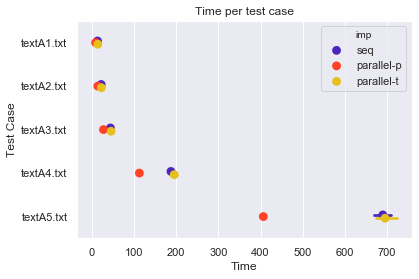

In [5]:
fig, ax =plt.subplots()
sns.pointplot(x='time elapsed', y='file name', hue='imp',
    data=kmp, dodge=True, join=False,orient="h",palette="CMRmap")
# ax.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11])
ax.set(xlabel='Time', ylabel='Test Case',title="Time per test case")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


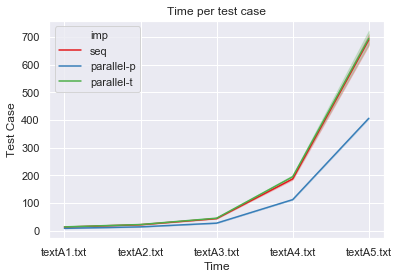

In [6]:
fig, ax =plt.subplots()
sns.set_style("darkgrid")
sns.lineplot(y='time elapsed', x='file name', hue='imp',data=kmp,estimator="mean",palette = 'Set1')
ax.set(xlabel='Time', ylabel='Test Case',title="Time per test case")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


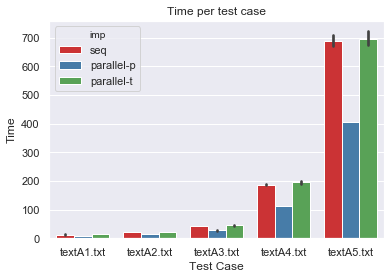

In [7]:
fig, ax =plt.subplots()
sns.set_style("darkgrid")
sns.barplot(y='time elapsed', x='file name', hue = 'imp', data =kmp,palette = 'Set1')
ax.set(xlabel='Test Case', ylabel='Time',title="Time per test case")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


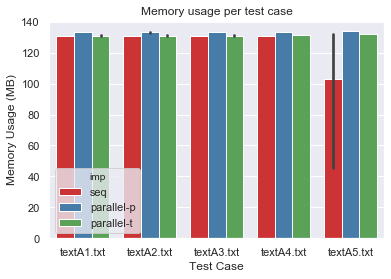

In [8]:
fig, ax =plt.subplots()
sns.set_style("darkgrid")
sns.barplot(y='memory', x='file name', hue = 'imp', data =kmp,palette = 'Set1')
ax.set(xlabel='Test Case', ylabel='Memory Usage (MB)',title="Memory usage per test case")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


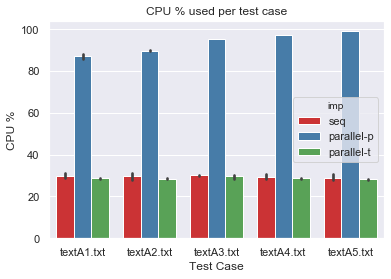

In [9]:
fig, ax =plt.subplots()
sns.set_style("darkgrid")
sns.barplot(y='cpu', x='file name', hue = 'imp', data =kmp,palette = 'Set1')
ax.set(xlabel='Test Case', ylabel='CPU %',title="CPU % used per test case")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


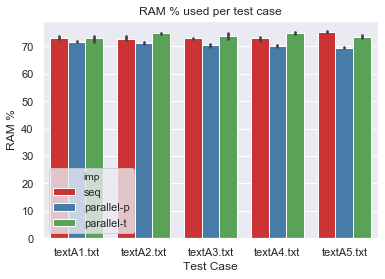

In [10]:
fig, ax =plt.subplots()
sns.set_style("darkgrid")
sns.barplot(y='ram', x='file name', hue = 'imp', data =kmp,palette = 'Set1')
ax.set(xlabel='Test Case', ylabel='RAM %',title="RAM % used per test case")
plt.show()

In [11]:
print("Parallel (both) vs Sequential: Time")
stats.ttest_ind(kmp.loc[kmp['imp']=='seq']['time elapsed'], 
                kmp.loc[(kmp['imp']=='parallel-p') | (kmp['imp']=='parallel-t')]['time elapsed'])

Parallel (both) vs Sequential: Time


Ttest_indResult(statistic=0.4982774942291894, pvalue=0.6208276238535821)

In [12]:
print("Parallel-P vs Parallel-T: Time")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['time elapsed'], 
                kmp.loc[kmp['imp']=='parallel-t']['time elapsed'])

Parallel-P vs Parallel-T: Time


Ttest_indResult(statistic=-1.0060515847564033, pvalue=0.32300632496245274)

In [13]:
print("Parallel (both) vs Sequential: CPU")
stats.ttest_ind(kmp.loc[kmp['imp']=='seq']['cpu'], 
                kmp.loc[(kmp['imp']=='parallel-p') | (kmp['imp']=='parallel-t')]['cpu'])

Parallel (both) vs Sequential: CPU


Ttest_indResult(statistic=-3.6664839251093397, pvalue=0.000671946798898288)

In [14]:
print("Parallel-P vs Parallel-T: CPU")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['cpu'], 
                kmp.loc[kmp['imp']=='parallel-t']['cpu'])

Parallel-P vs Parallel-T: CPU


Ttest_indResult(statistic=53.07272705513143, pvalue=1.2027060803132852e-29)

In [15]:
print("Parallel-P vs Parallel-T & Seq: CPU")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['cpu'], 
                kmp.loc[(kmp['imp']=='parallel-t') | (kmp['imp']=='seq')]['cpu'])

Parallel-P vs Parallel-T & Seq: CPU


Ttest_indResult(statistic=72.66200731473795, pvalue=1.2358900469638911e-46)

In [16]:
print("Parallel-P vs Parallel-T & Seq: Time")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['time elapsed'], 
                kmp.loc[(kmp['imp']=='parallel-t') | (kmp['imp']=='seq')]['time elapsed'])

Parallel-P vs Parallel-T & Seq: Time


Ttest_indResult(statistic=-1.0710796086004348, pvalue=0.2901087886358806)

In [17]:
print("Parallel-P vs Parallel-T: Mem")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['memory'], 
                kmp.loc[kmp['imp']=='parallel-t']['memory'])

Parallel-P vs Parallel-T: Mem


Ttest_indResult(statistic=15.76094784903132, pvalue=1.881804123703459e-15)

In [18]:
print("Parallel-P vs Parallel-T & Seq: CPU")
stats.ttest_ind(kmp.loc[kmp['imp']=='parallel-p']['memory'], 
                kmp.loc[(kmp['imp']=='parallel-t') | (kmp['imp']=='seq')]['memory'])

Parallel-P vs Parallel-T & Seq: CPU


Ttest_indResult(statistic=1.24325283522853, pvalue=0.22051083855573764)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Time Distribution')

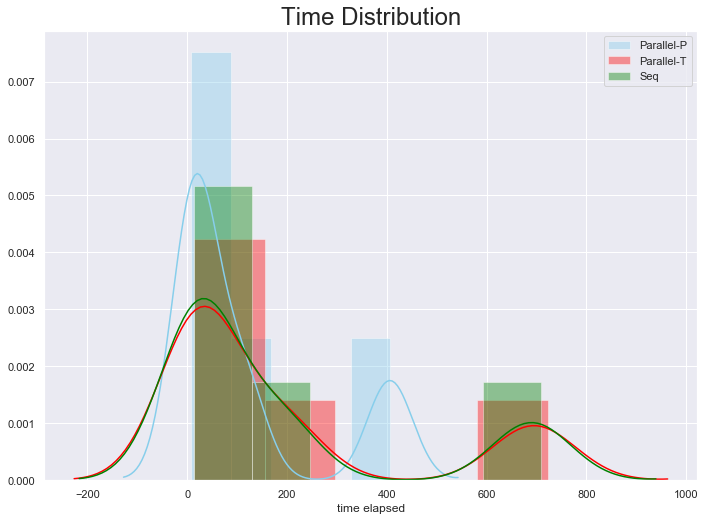

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(kmp.loc[kmp['imp']=='parallel-p']['time elapsed'], color="skyblue", label="Parallel-P")
sns.distplot(kmp.loc[kmp['imp']=='parallel-t']['time elapsed'] , color="red", label="Parallel-T")
sns.distplot(kmp.loc[kmp['imp']=='seq']['time elapsed'] , color="green", label="Seq")
plt.legend()
sns.set(font_scale=2)
plt.title("Time Distribution")